# **Parallelizing Neural Network Training with PyTorch (2)**

## **Building an NN model in PyTorch**

- Basic utility components of PyTorch for manipulating tensors and organizing data into formats that we can iterate over during training.

#### **The PyTorch neural network module (torch.nn)**

- `torch.nn` is an elegantly designed module developed to help create and train NNs. It allows easy prototyping and the building of complex models in just a few lines of code.
- `torch.nn` and `torch.optim`
- `Dataset` and `DataLoader`
- `nn.Module` class

#### **Building a linear regression model**

- Build a simple model to solve a linear regression problem.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

X_train.shape, y_train.shape

((10, 1), (10,))

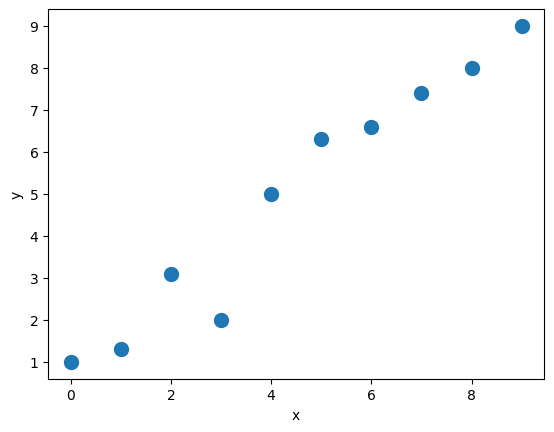

In [3]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

- Standardize the features (mean centering and dividing by the standard deviation)
- Create a PyTorch Dataset for the training set and a corresponding DataLoader

In [4]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [5]:
train_dl

**Linear regression from scratch**

- model for linear regression as $z = wx + b$
- define parameters of our model, weight and bias
- define the model() function to determine how this model uses the input data to generate its output.

In [6]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

- define loss function that we want to minimize to find the optimal model weights
- `mean squared error (MSE)` as our loss function:

In [7]:
def loss_fn(input, target):
    return (input-target).pow(2).mean()

- `stochastic gradient descent` optimization algorithm
- compute the gradients

In [10]:
learning_rate = 1e-3
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 26.1645
Epoch 10  Loss 9.5615
Epoch 20  Loss 20.9817
Epoch 30  Loss 9.1085
Epoch 40  Loss 9.3489
Epoch 50  Loss 2.7146
Epoch 60  Loss 5.9711
Epoch 70  Loss 2.9416
Epoch 80  Loss 2.0046
Epoch 90  Loss 1.5627
Epoch 100  Loss 1.2390
Epoch 110  Loss 0.2136
Epoch 120  Loss 0.8276
Epoch 130  Loss 0.3162
Epoch 140  Loss 0.1408
Epoch 150  Loss 0.0634
Epoch 160  Loss 1.9667
Epoch 170  Loss 0.1075
Epoch 180  Loss 0.3250
Epoch 190  Loss 0.9476


- Let's look at the trained model and plot it.
- Apply same standardization to our test data.

Final Parameters: 2.670930862426758 4.88258695602417


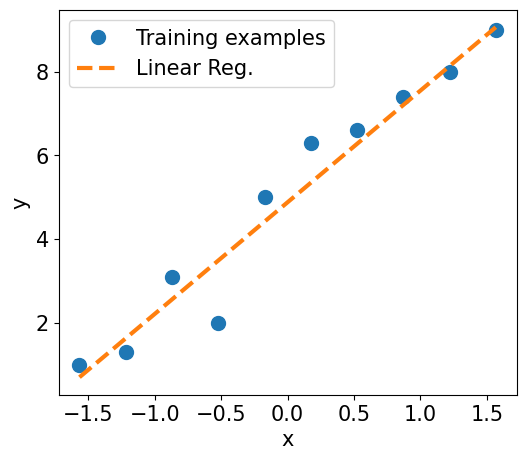

In [15]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('figures/12_08.pdf')

plt.show()

#### **Model training via the torch.nn and torch.optim modules**

- `torch.nn` module provides a set of loss fucntions.
- `torch.optim` supports most commonly used optimization algorithms

In [16]:
import torch.nn as nn 

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

- Call the `step()` method of the optimizer to train the model.

In [17]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0]
        
        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
        
        # 3. Compute gradients
        loss.backward()
        
        # 4. Update parameters using gradients
        optimizer.step()
        
        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 27.5217
Epoch 10  Loss 5.4938
Epoch 20  Loss 25.5754
Epoch 30  Loss 22.2742
Epoch 40  Loss 11.9622
Epoch 50  Loss 0.0745
Epoch 60  Loss 7.0669
Epoch 70  Loss 4.6566
Epoch 80  Loss 2.1235
Epoch 90  Loss 0.7432
Epoch 100  Loss 0.0600
Epoch 110  Loss 1.0181
Epoch 120  Loss 0.7559
Epoch 130  Loss 0.2016
Epoch 140  Loss 0.3912
Epoch 150  Loss 0.1100
Epoch 160  Loss 0.2599
Epoch 170  Loss 0.4352
Epoch 180  Loss 0.1192
Epoch 190  Loss 0.0689


- visualize results and make sure that they are similar to the results of the previous method

Final Parameters: 2.6411759853363037 4.87037992477417


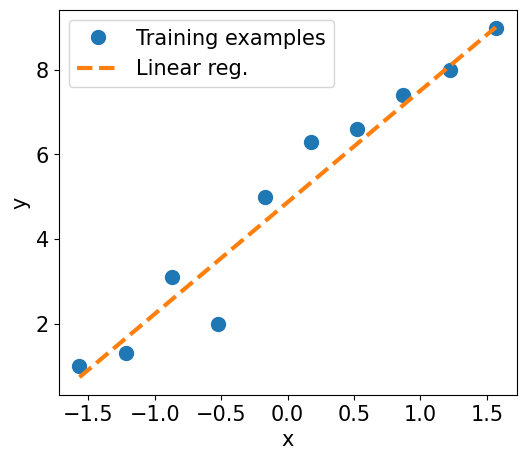

In [18]:
print('Final Parameters:', model.weight.item(), model.bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm)


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach().numpy(), y_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('ch12-linreg-2.pdf')

plt.show()

#### **Building a multilayer perceptron for classifying flowers in the Iris dataset**

- Classification task using the `Iris` flower dataset
- Two layer perceptron using the `torch.nn` module

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [39]:
X_train.shape, X_test.shape

((100, 4), (50, 4))

- Standardize the features (mean centering and dividing by the standard deviation) and create a PyTorch `Dataset` for the training set and a corresponding `DataLoader`:

In [40]:
from torch.utils.data import DataLoader, TensorDataset

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

- use the `torch.nn` module to build a model efficiently
- `nn.Module` class
- use the `Linear Layer` (fully connected layer or dense layer)
  - `nn.Linear` applies an affine linear transformation to the incoming data: $y = xA^{T} + b$
  
- Two hidden layers

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
X_train_norm.shape[0]

100

- Here, we used the sigmoid activation function for the first layer and softmax activation for the last (output) layer. 
-  Softmax activation in the last layer is used to support multiclass classification since we have three class labels here (which is why we have three neurons in the output layer).

**Specify the loss function as cross-entropy loss and the optimizer as Adam**

In [43]:
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

- Train the model, and specify the number of epochs to be 100.

In [ ]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

- The `loss_hist` and `accuracy_hist` lists keep the training loss and the training accuracy after each epoch. 

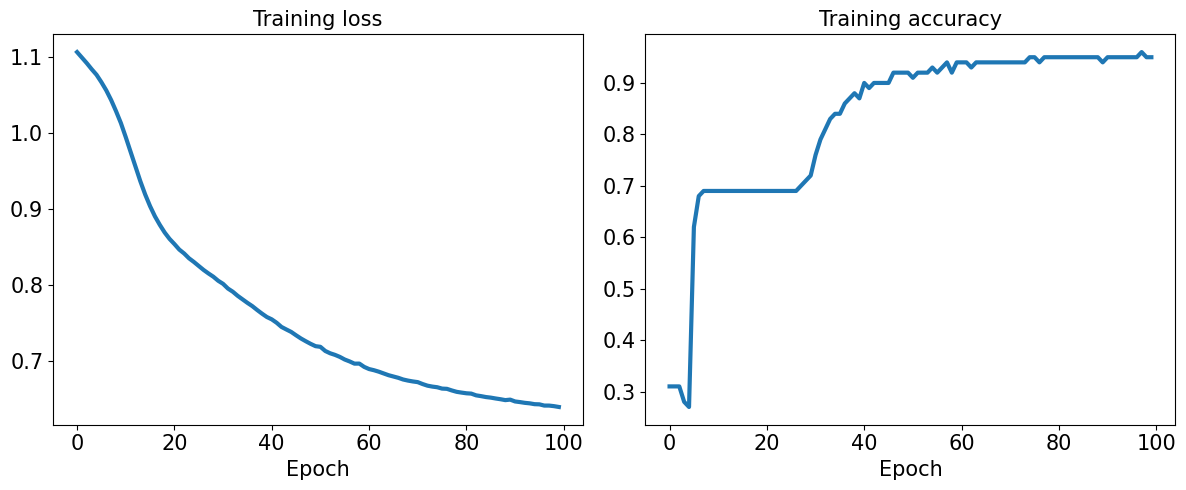

In [47]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

#### **Evaluating the trained model on the test dataset**

- evaluate the classification accuracy of the trained model on the test dataset.
- Apply same standardization to the test data.

In [ ]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test    = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


**Saving and reloading the trained model**

- Trained models can be saved on disk for future use.
- saves the model architecture and all the learned parameters.
- `pt` or `pth` file extension.

In [49]:
path = 'iris_classifier.pt'
torch.save(model, path)

- Reload the saved model.
- easily rebuild and reload the parameters in just one line.

In [ ]:
# Load with weights_only=False — this allows loading the model class object:
model_new = torch.load(path, weights_only=False)

In [54]:
# verify the model architecture
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

- Let's evaluate this new model that is reloaded on the test dataset to verify that the results are the same;

In [55]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


- If you want to save only the learned parameters, you can use `save(model.state_dict())` as follows:

In [56]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

- reload the saved parameters

In [57]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

### **Choosing activation functions for multilayer neural networks**

- The logistic (sigmoid) activation function mimics the concept of a neuron in a brain most closely - we can think of it as the probability of whether a neuron fires.
- If the sigmoid function returns output that is close to zero, the NN will learn very slowly, and it will be more likely to get trapped in the local minima of the loss landscape during training.
- hyperbolic tangent as an activation function in hidden layers are always preferred.

##### **Logistic function recap**

The logistic (sigmoid) function computes the following; 

$$\sigma_{logistic}(z) = \frac {1}{ 1 + e^{-z}}$$

In [58]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


- `88.8%` probability that this particular sample, `x`, belongs to the positive class.
- An output layer consisting of multiple logistic activation units does not produce meaningful, interpretable probability values.

In [ ]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])

y_probas = logistic(Z)
print('Net Input: \n', Z)

Net Input: 
 [1.78 0.76 1.65]


In [60]:
print('Output Units:\n', y_probas)

Output Units:
 [0.85569687 0.68135373 0.83889105]


- One way to predict the class label from the output units obtained earlier is to use the maximum value:

In [61]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class) 

Predicted class label: 0


- it can be useful to compute meaningful class probabilities for multiclass predictions.

#### **Estimating class probabilities in multiclass classification via the softmax function**

- `softmax` activation function is a soft form of the `argmax` function.
- `softmax` provides the probability of each class in multiclass settings (multinomial logistic regression)
- In `softmax`, the probability of a particular sample with net input `z` belonging to the ith class can be computed with a normalization term in the denominator, that is, the sum of the exponentially weighted linear functions:


$$p(z) = \sigma(z) = \frac {e^{z_{i}}}{\sum^{M}_{j = 1} e^{z_{j}}}$$

In [62]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)

In [63]:
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [64]:
np.sum(y_probas)

np.float64(1.0)

- The predicted class probabilities now sum to `1`.
- It may help to think of the result of the `softmax function` as a `normalized` output that is useful for obtaining meaningful class-membership predictions in multiclass settings.


In [65]:
# convert Z into a tensor, to see how to use the torch.softmax() activation function
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

#### **Broadening the output spectrum using a hyperbolic tangent**

- `Hyperbolic tangent` (commonly known as tanh), interpreted as a rescaled version of the logistic function.
- It has a broader output spectrum ranging in the open interval `(-1, 1)`, which can improve the convergence of the backpropagation algorithm.


$$\sigma_{logistic}(z) = \frac {1}{ 1 + e^{-z}}$$

$$\sigma_{tanh}(z) = 2 \times \sigma_{logistic}(2z) - 1 = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$$

- In contrast, the logistic function returns an output signal ranging in the open interval `(0, 1)`.
- Simple comparison of the logistic function and the hyperbolic tangent, let's plot the two sigmoidal functions:

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

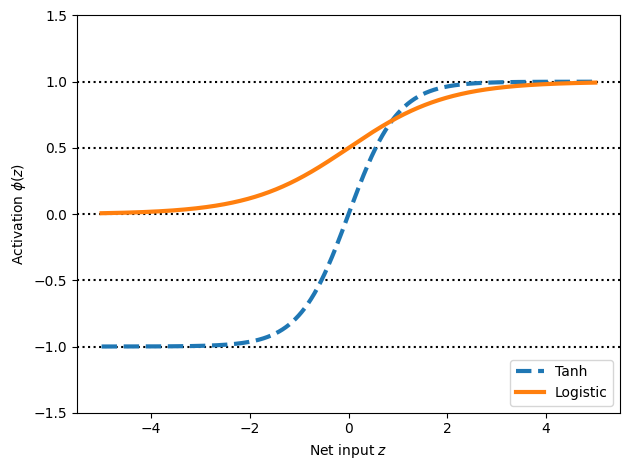

In [68]:
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)


plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

#plt.savefig('figures/12_10.pdf')
plt.show()

- Alternatively, when building an `NN` model, we can use `torch.tanh(x)` in PyTorch to achieve the same results:

In [69]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [70]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [73]:
from scipy.special import expit
expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [74]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

#### **Rectified linear unit activation**

- `ReLU` is another activation function that is often used in deep `NNs`.
- `ReLU` activation addresses the vanishing gradient problem of `tanh` and `logistic`(sigmoid) activations.


$$\sigma(z) = max(0, z)$$

- `ReLU` is a nonlinear activation that is good for learning complex functions with `NNs`.
- The derivative of `ReLU`, with respect to its input, is always `1` for positive input values. Therefore, it solves the problem of vanishing gradients, making it suitable for deep `NNs`.

In [75]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

In [91]:
def relu(z):
    return np.maximum(0.0, z)

relu(z)

array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])

![Activation functions block](./figures/activation-block.png)